# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
type_log = pd.read_csv('../data/type_log.csv')

# Background

### How do drilling rigs work from a Geologist's point of view?

The tool that measures gamma radiation is a common piece of the bottom hole assembly along with a motor and drilling bit.  As the rig drills through the rock, the gamma ray tool collects data from the rocks, which helps geologists identify their position.  The rig drills rock a couple of different ways.  The first is by using a mechanical drill bit with diamond teeth that turns and cuts through the rock, much like you use a hand drill to cut through wood.  The second way is like a power washer.  There are holes in the drilling bit that shoot mud forward that actually does the majority of the drilling.  The drilling mud is one of the most important parts of the whole operation.  Like I said, it helps actually drill the hole, it also has numerous properties that are constantly checked.  These properties keep the mud a certain weight and viscosity which holds dangerous gas in the hole.  If the mud doesn't have the correct properties, the gas can literally flow out of the hole and explode or burn a drilling rig down within minutes.  The third reason for drilling mud is it carries the rocks that we are drilling to the surface and cleans the hole.  The geologist on site examines these rocks to also judge position along with oil content etc.  The fourth and most important reason for the mud these days is it helps the people who run the gamma ray tool to send signals to the surface.  There is a small piston in the tool that displaces the mud, sending morse code like signals to a computer on the surface that collects these signals and translates them for our normal work computers to interpret.  The second geologist looks at these graphs and compares them with other gamma ray data in the area to judge their position in the stratigraphic column.  The geologist on site and the one examining the gamma ray logs stay in constant communication, making sure they are drilling where they are supposed to for the most efficient and productive wells possible.

### What is Gamma Ray?

Different types of rock emit different amounts and different spectra of natural gamma radiation.  In particular, shales usually emit more gamma rays than other sedimentary rocks, such as sandstone, gypsum, salt, coal, dolomite, or limestone.  This is because radioactive potassium is a common component in their clay content, and because the cation exchange capacity of clay causes them to absorb uranium and thorium.

### What is Density Porosity?

Porosity is the ratio of pore volume to its total volume. Porosity is controlled by rock type, pore distribution, cementation, diagenetic history and composition. Porosity is not controlled by grain size, as the volume of between-grain space is related only to the method of grain packing.  

So why is this porosity important?  Well, when we are looking for potential reservoirs for oil and gas the pore space is what we are looking for.  Not only is it important that there is a large amount of space between the grains of the rock, but we want the pore space to be connected ideally.  This allows the fluids and gases to migrate through the rock.  But think about it...  Migration can be bad also.  What if the fluid migrates away from your bore hole?  This is why most oil/gas fields have what is called a cap rock on top of the very porous rock.  A cap rock is a rock with no porosity which traps the fluids and gas in the reservoir.  And this all works for one more important reason.  Oil and gas are less dense than water, so if they are present, they are forced above the water and end up getting stuck up against the cap rock.  If the surrounding reservoir is very porous it will allow more oil and gas to migrate into that "trap".

My favorite way of visualizing porosity is, imagine filling a five gallon bucket up with golf balls.  The space around the golf balls is your porosity.  If you look close enough at a sandstone for example, you will see it is very similar in structure to the golf ball example.  

### What is Resistivity?

Resistivity logging is a method of well logging that works by characterizing the rock or sediment in a borehole by measuring its electrical resistivity. Resistivity is a fundamental material property which represents how strongly a material opposes the flow of electric current. In these logs, resistivity is measured using four electrical probes to eliminate the resistance of the contact leads. The log must run in holes containing electrically conductive mud or water, i.e., with enough ions present in the drilling fluid.

Resistivity is one of the most important tools we use especially for exploratory drilling.  Since it uses electrical current, we can see the difference between water and oil.  The electrical current flows through the very different substances based on the amount of ions present.  So, after you go through all the trouble of drilling this very very expensive hole in the ground you can tell if it is just filled with water or there is actually some oil down there!  

Most of use daydreamed through Chemistry in high school or college.  But I can almost guarantee that you did an experiment where you dumped a bunch of salt into water and then measured the electrical current of both and recorded the difference.  This experiment shows that the water with salt conducts electricity much better because of the presence of the NaCl ions.  This the same reason why pools are so dangerous in a lightning storm, because if the pool was struck, it would conduct electricity very very well.  And actually, contrary to belief you are relatively safe in a river for example because of the low amount of ions present. 

# Problem Statement

I want to build a multiclass classification model (Decision Tree, KNN) that will input a geologic type log and be able to pick the desired geologic formation tops and return the values to the user.

# Executive Summary

The purpose of this project is to predict geologic formations through modeling. Data was cleaned and null values removed.  Three variables were selected based on their importance to the potential clientele, Gamma Ray, Density Porosity and Resistivity.  I tried to use k-means to build an unsupervised model, but it was unable to cluster and classify the geologic data effectively.  So, I used my domain knowledge to turn it into a supervised learning model instead.  I went through and picked each geologic top and gave them a numeric value so the model could train itself effectively.  Modeling commenced with KNN and Random Forest Classifier. Random Forest Classifier was chosen as the production model because of its near perfect results on the test data.

# EDA

Below is an example of what EDA I would normally do to clean up the data so I can use it for my project.  The files originally come from the well site in a format called LAS, and I already knew how to reformat them in Microsoft Excel.  I decided to just clean the data quickly in Excel while changing the format simultanously.

In [3]:
type_log.head(10_000)

,DEPT,NPHI,GR,TENS,GRTH,LLS,LLD,MSFL,CALI,CAL1,RHOB,DRHO,PE,DPHI,MDT,SPHI,ITTI,ITTT,XPHI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3733,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500
2,0.8733,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500
3,1.3733,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500
4,1.8733,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4997.3733,0.0700,66.5357,4219.8101,15.5603,79.3923,87.5616,44.6094,9.2109,8.8883,2.6068,0.0112,2.7031,0.0641,61.3558,0.1001,30.6779,390749.3438,0.0719
9996,4997.8733,0.0617,62.5368,4301.5542,17.4984,72.8831,75.5762,54.9272,9.1378,8.8931,2.5988,0.0068,2.6839,0.0691,61.2389,0.0993,61.2389,390718.6563,0.0682
9997,4998.3733,0.0710,70.0908,4191.8403,23.4621,57.9067,61.4559,35.6144,9.1386,8.9059,2.5736,0.0017,2.6172,0.0847,61.8355,0.1036,30.9177,390657.4063,0.0800
9998,4998.8733,0.0846,82.3271,4147.4614,29.9231,47.9719,55.0196,22.5361,9.1776,8.9010,2.5374,-0.0018,2.5662,0.1072,61.8355,0.1036,30.9177,390657.4063,0.0974


In [4]:
type_log.shape

(21050, 19)

In [5]:
type_log.dtypes

DEPT    float64
NPHI    float64
GR      float64
TENS    float64
GRTH    float64
LLS     float64
LLD     float64
MSFL    float64
CALI    float64
CAL1    float64
RHOB    float64
DRHO    float64
PE      float64
DPHI    float64
MDT     float64
SPHI    float64
ITTI    float64
ITTT    float64
XPHI    float64
dtype: object

In [6]:
type_log = type_log.dropna(how = 'all')

In [7]:
type_log.drop(type_log[type_log['GR'] < 0].index, inplace = True)

In [8]:
type_log.head()

,DEPT,NPHI,GR,TENS,GRTH,LLS,LLD,MSFL,CALI,CAL1,RHOB,DRHO,PE,DPHI,MDT,SPHI,ITTI,ITTT,XPHI
200,99.8733,0.4530,40.1618,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
201,100.3733,0.5271,42.1417,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
202,100.8733,0.4311,38.1820,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
203,101.3733,0.4813,35.9287,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
204,101.8733,0.5825,36.8431,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [9]:
type_log.drop(columns=['NPHI', 'TENS', 'GRTH', 'LLS', 'LLD', 'MSFL', 'CALI', 'CAL1', 'RHOB', 'DRHO', 'PE', 'DPHI', 'MDT', 'SPHI', 'ITTI', 'ITTT', 'XPHI'], inplace=True)

In [10]:
type_log.head()

,DEPT,GR
200,99.8733,40.1618
201,100.3733,42.1417
202,100.8733,38.1820
203,101.3733,35.9287
204,101.8733,36.8431


In [11]:
type_log.shape

(20575, 2)

# Modeling

In [12]:
X = type_log
ss = StandardScaler().fit(X)
X = ss.transform(X)

In [13]:
km = KMeans(n_clusters=4)
km.fit(X)

KMeans(n_clusters=4)

In [14]:
km.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [15]:
silhouette_score(X, km.labels_)

0.5047974470343078

In [16]:
type_log['type'] =  km.labels_

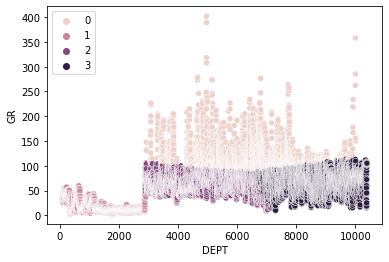

In [17]:
sns.scatterplot(data=type_log, x='DEPT', y='GR', hue=km.labels_);

I tried to use k-means to build an unsupervised model, but it was unable to cluster and classify the geologic data effectively. So, I used my domain knowledge to turn it into a supervised learning model instead. I went through and picked each geologic top and gave them a numeric value so the model could train itself effectively.

In [18]:
type_log = pd.read_csv('../data/Log_1_TC.csv')

In [19]:
type_log.head()

,DEPT,DPHI,GR,ILD,FORMATION
0,4899.5,5.025,108.452,9.543,1
1,4900.0,4.945,104.012,10.139,1
2,4900.5,4.549,97.739,11.076,1
3,4901.0,4.311,93.312,11.531,1
4,4901.5,4.153,91.193,11.970,1


In [20]:
type_log.dtypes

DEPT         float64
DPHI         float64
GR           float64
ILD          float64
FORMATION      int64
dtype: object

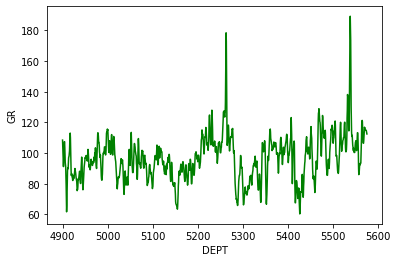

In [21]:
sns.lineplot(data=type_log, x="DEPT", y="GR", color='green');

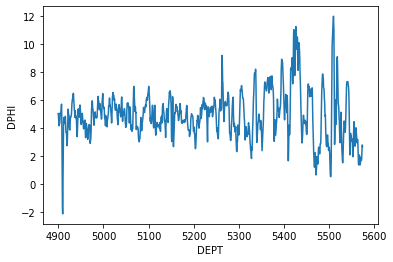

In [22]:
sns.lineplot(data=type_log, x="DEPT", y="DPHI");

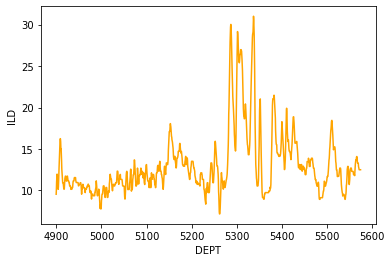

In [23]:
sns.lineplot(data=type_log, x="DEPT", y='ILD', color='orange');

### K Nearest Neighbors

In [24]:
type_log = type_log.dropna()

In [25]:
type_log.isnull().sum()

DEPT         0
DPHI         0
GR           0
ILD          0
FORMATION    0
dtype: int64

In [26]:
X = type_log.drop(columns='FORMATION', axis=1)
y = type_log.FORMATION
ss = StandardScaler().fit(X)
X_sc = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc,y)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_train,y_train)

0.9842209072978304

In [29]:
knn.score(X_test, y_test)

0.9763313609467456

In [30]:
preds = knn.predict(X_test)

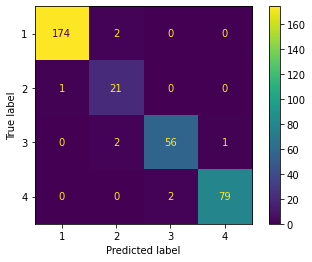

In [31]:
plot_confusion_matrix(knn, X_test, y_test);

### Random Forest

In [32]:
rfc = RandomForestClassifier(min_samples_leaf=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3)

In [33]:
rfc.score(X_train,y_train)

1.0

In [34]:
rfc.score(X_test, y_test)

1.0

In [35]:
preds = rfc.predict(X_test)

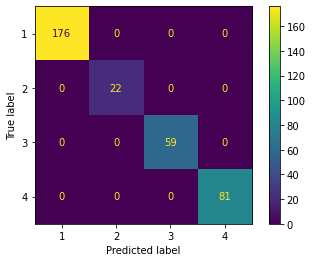

In [36]:
plot_confusion_matrix(rfc, X_test, y_test);

In [37]:
preds

array([1, 1, 4, 1, 1, 1, 1, 1, 4, 3, 1, 4, 1, 4, 4, 1, 4, 1, 4, 3, 1, 1,
       1, 1, 4, 1, 4, 4, 1, 1, 3, 3, 2, 1, 1, 3, 1, 3, 4, 2, 1, 3, 3, 3,
       1, 4, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 2, 4, 1, 4, 3,
       1, 4, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4, 1, 1, 1, 4, 4, 3, 1, 1, 1, 3,
       4, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       4, 4, 1, 3, 1, 2, 4, 4, 4, 1, 3, 1, 4, 4, 3, 2, 3, 1, 1, 3, 4, 1,
       4, 1, 4, 1, 4, 1, 1, 4, 4, 2, 1, 1, 1, 1, 1, 1, 3, 1, 4, 4, 1, 1,
       1, 1, 2, 1, 1, 4, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 4, 2, 4,
       1, 2, 1, 2, 1, 4, 1, 1, 4, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 3, 1, 4, 1, 2, 3, 3, 1, 1, 3, 1, 4, 4, 4, 3,
       4, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 4, 1, 3, 4, 1, 1, 4, 4, 4, 2, 1,
       3, 1, 1, 3, 4, 3, 1, 4, 1, 4, 1, 3, 3, 3, 1, 1, 1, 1, 4, 1, 3, 3,
       1, 1, 1, 1, 1, 4, 4, 4, 1, 3, 1, 1, 3, 4, 3, 4, 4, 4, 4, 1, 2, 2,
       4, 4, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 1, 4, 1,

# Future Improvements

There is a lot of potential for this idea, and more work to be done.  First off, I would like to make a dashboard which would provide a user friendly platform for users to upload their type logs and view the results.  Since there are so many different oil/fields in different types of rock around the nation, I would also like to add a drop down menu so you could select which field you are working in.  My above example only represents one oil/field it would be great for this product to be used for numerous different areas.  Another idea for the dashboard would be to include Density Porosity and Resistivity measurements which could help a client quickly decide whether an area is worth pursuing.

# Conclusion

All models performed with a high level of accuracy and minimized false positives and negatives. Random Forest Classifier was chosen as the production model due to its near perfect classification of the data set.

# Sources

https://en.wikipedia.org/wiki/Gamma_ray_logging

https://en.wikipedia.org/wiki/Porosity

https://en.wikipedia.org/wiki/Resistivity_logging